### Introduction to Principle Component Analysis (PCA)
1. How to implement PCA in a dataset to extract the important features 
2. How does PCA works to help us get the transformed principle of linear datasets 
3. How does PCA helps us to reduce the features and help us in getting only important features of datasets 

### Application of PCA approach 

1. The first application illustrates how you can use PCA to project 2-D data onto its principal axes, meaning the two orthogonal directions that explain most of the variance in your data.

2. For the second application, you will use PCA to project higher dimensional data down to a lower dimensional feature space. 
    - This is an example of dimension reduction, a powerful technique that has multiple benefits, including reducing your model-building computational load and, in many cases, the accuracy of your model. 
    - PCA can help you filter out redundant, linearly correlated variables and reduce the amount of noise in your data.

### Part I: Using PCA to project 2-D data into it's principal axes 

In [47]:
#Importing libraries
import numpy as np  
import matplotlib.pyplot as plt 

### Create dataset
Next we will create a 2-dimensional dataset containing two linearly correlated features.

Use a bivariate normal distribution.

Both features, X1 and X2, will have zero mean and a covariance given by the (symmetric) covariance matrix:

\begin{equation}
\begin{pmatrix}
  3  & 2     \\\\\\\\
  2  & 2     \\
\end{pmatrix}
\end{equation}

Here, the diagonal elements define the variances of X1 and X2 (3 and 2, respectively), while the off-diagonal element is the covariance (2) between X1 and X2, which expresses how similarly these features vary.

In [5]:
#Create dataset 
np.random.seed(42)

mean = [0, 0]

covariance = [[3, 2], [2, 2]]

X = np.random.multivariate_normal(mean= mean, cov= covariance, size= 200)

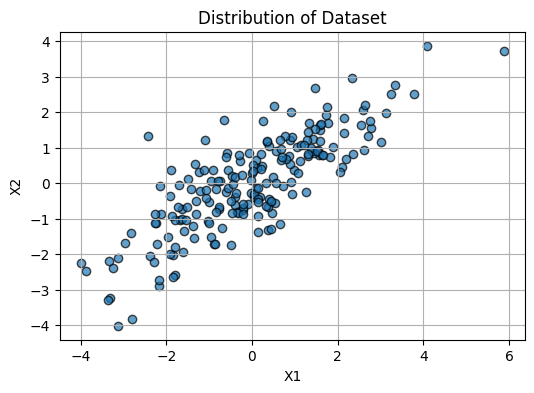

In [76]:
#Visualization of dataset 
plt.figure(figsize= (6, 4))

plt.scatter(X[:, 0], X[:, 1], edgecolors= 'k', alpha= 0.7)
plt.title('Distribution of Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [7]:
#Fit and transform PCA on the datasets 
from sklearn.decomposition import PCA

pca = PCA(n_components= 2, copy= False)
pca_X = pca.fit_transform(X)

In [13]:
#Get principle components for feature = 2
'''
Principle components are always sorted in descending order of features variance
'''
components = pca.components_
print(components)

[[ 0.78215821  0.62307987]
 [-0.62307987  0.78215821]]


In [14]:
#The ratio of variance of features (2)
pca_variance = pca.explained_variance_ratio_
print(pca_variance)

[0.9111946 0.0888054]


Percentage of variance in the 2 dimensional feature dataset 
1. 0.911 --> Represent the first component variance in dataset which is 91%
2. 0.088 --> Represent the second component variance in dataset which is ~8%

In [18]:
#Transformation and changing the bais of feature variable's 
pca_component1 = np.dot(X, components[0])
pca_component2 = np.dot(X, components[1])

In [39]:
#Implement transformations with each components 
#Represent the projections of each data point along the principal directions in the original feature space.
x_pca1 = pca_component1 * components[0][0]
y_pca1 = pca_component1 * components[0][1]

x_pca2 = pca_component2 * components[1][0]
y_pca2 = pca_component2 * components[1][1]

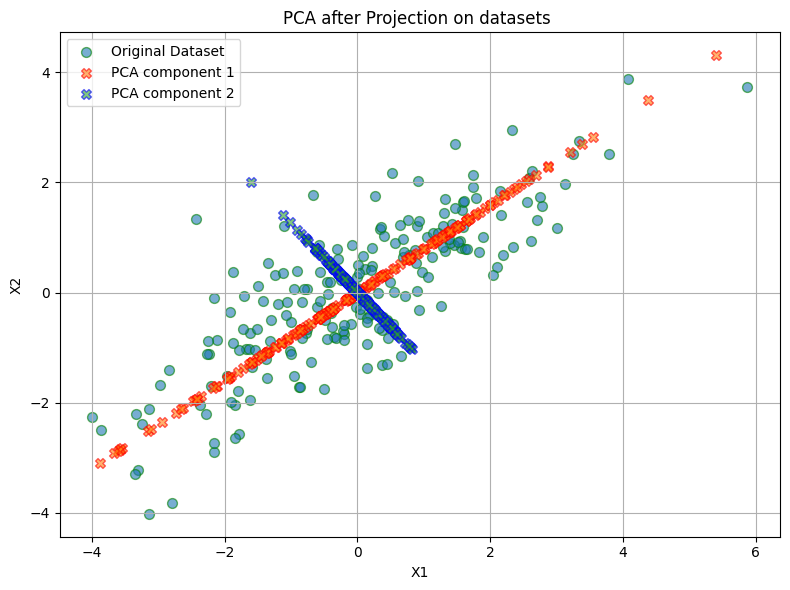

In [46]:
#Visualize each projection of data point along it's principle directions 

fig = plt.figure(figsize= (8, 6))

ax = fig.add_subplot(1, 1, 1)

#Scatter Plot to represent the datapoint's clearly 
#Original Dataset
ax.scatter(X[:, 0], X[:, 1], marker= 'o', ec= 'g', s= 50, alpha= 0.6, label= 'Original Dataset')

#PCA transformation dataset 
ax.scatter(x_pca1, y_pca1, marker= 'X', ec= 'r', s= 50, alpha= 0.6, label= 'PCA component 1')
ax.scatter(x_pca2, y_pca2, marker= 'X', ec= 'b', s= 50, alpha= 0.6, label= 'PCA component 2')

plt.title('PCA after Projection on datasets ')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Part II: Using PCA to reduce the features of the datasets 

In [54]:
#Using iris dataset 
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

target_name = iris.target_names
print(target_name)

['setosa' 'versicolor' 'virginica']


In [70]:
#Data Preprocessing applying feature standarization of dataset 
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

stand_x = standard.fit_transform(x)

In [71]:
#Applying PCA transformation on features of the iris datasets 
pca = PCA(n_components= 2)
pca_x = pca.fit_transform(stand_x)

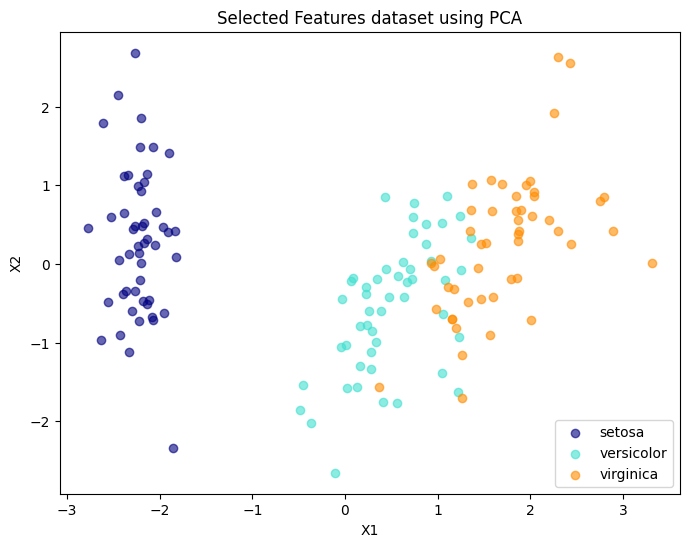

In [75]:
#Visualization of transformation of 4 features dataset into 2 features datasets 
fig = plt.figure(figsize= (8, 6))

#Defining colors for each target iris flower 
colors = ['navy', 'turquoise', 'darkorange']

ax = fig.add_subplot(1, 1, 1)
#As target values are list [0, 1, 2] ==> [Setosa, versicolor, virginica]
for target, i, col in zip(target_name, [0, 1, 2], colors):

    #Bit masking to label or map the target values with target_coloumns 
    my_members = (y == i)

    ax.scatter(pca_x[my_members, 0], pca_x[my_members, 1], marker= 'o', color= col, alpha= 0.6, lw= 1, label= target)

plt.title('Selected Features dataset using PCA')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc= 'best', )
plt.show()


### TODO: - 

1. Need to understand more on the PCA analysis 
2. How reflection works in PCA and how linear Algebra is used here 
3. What is the main work of eigenvalue and eigenvector in PCA 